In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_final = pd.read_csv('./input/cleaned_enriched_df.csv')

In [2]:
max_price = 100
state = 'United States of America'
accepted_states = sorted(list(set(df_final['state'])))
if state in accepted_states:
    df_filtered = df_final[df_final['state'] == state]

In [5]:
def pie_chart_stars(valuecounts,labels,state,sort_legend = True):    
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    x = np.array([str(e)+' *' for e in labels])
    y = np.array(valuecounts)
    porcent = 100.*y/y.sum()   
    selected_colors = []
    while len(selected_colors) < len(labels):
        r = random.choice(['black','dimgrey','grey','darkgrey','lightgrey','whitesmoke','rosybrown','lightcoral','indianred','brown','firebrick','maroon','darkred','red','mistyrose','salmon','tomato','darksalmon','coral','orangered','lightsalmon','sienna','chocolate','saddlebrown','sandybrown','peachpuff','peru'])
        if r not in selected_colors: selected_colors.append(r)              
    fig1, ax1 = plt.subplots()
    explode = tuple([random.choice([0.01,0.01,0.01]) for i in range(len(labels))])
    patches, texts, autotexts = ax1.pie(y, labels = x, colors=selected_colors, autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
    ax1.axis('equal')
    fig1.set_size_inches(5,5)
    labels = ['{0}   {1:1.1f} %'.format(i,j) for i,j in zip(x, porcent)]
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))
    plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.6, 0.5),fontsize=12)
    fig1.suptitle('{} {}'.format('  Michelin stars in', state), fontsize=16)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)   
    plt.savefig('./output/piechart_stars.png',bbox_inches='tight',dpi=300)

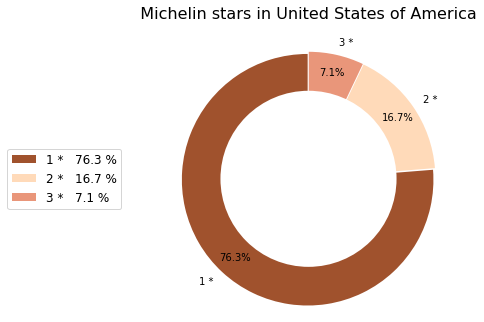

In [6]:
values = [e for e in df_filtered['stars'].value_counts()]
labels = df_filtered['stars'].value_counts().index.tolist()
pie_chart_stars(values,labels,state)

In [3]:
def pie_chart_cuisine(valuecounts,labels,state,sort_legend = True):    
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    x = np.array([str(e)+' *' for e in labels])
    y = np.array(valuecounts)
    porcent = 100.*y/y.sum()   
    selected_colors = []
    while len(selected_colors) < len(labels):
        r = random.choice(['black','dimgrey','grey','darkgrey','lightgrey','whitesmoke','rosybrown','lightcoral','indianred','brown','firebrick','maroon','darkred','red','mistyrose','salmon','tomato','darksalmon','coral','orangered','lightsalmon','sienna','chocolate','saddlebrown','sandybrown','peachpuff','peru'])
        if r not in selected_colors: selected_colors.append(r)              
    fig1, ax1 = plt.subplots()
    explode = tuple([random.choice([0.01]*26) for i in range(len(labels))])
    patches, texts = ax1.pie(y, colors=selected_colors, startangle=90, pctdistance=0.85, explode=explode)
    ax1.axis('equal')
    fig1.set_size_inches(5,5)
    labels = ['{0}   {1:1.1f} %'.format(i,j) for i,j in zip(x, porcent)]
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))
    plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-1, 0.5),fontsize=12)
    fig1.suptitle('{} {}'.format('  Cuisine types in', state), fontsize=16)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)   
    plt.savefig('./output/piechart_cuisine.png',bbox_inches='tight',dpi=300)

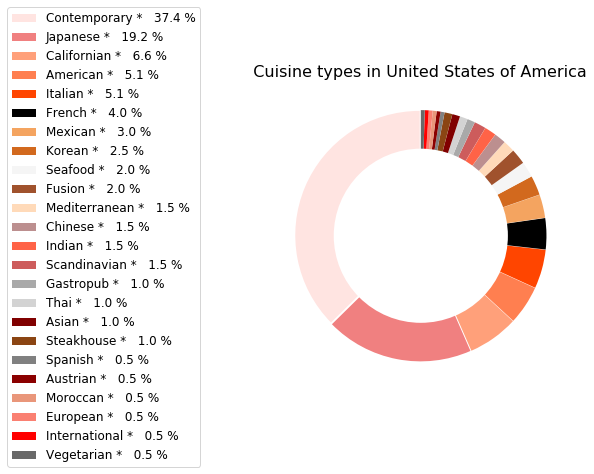

In [4]:
values = [e for e in df_filtered['cuisine'].value_counts()]
labels = df_filtered['cuisine'].value_counts().index.tolist()
pie_chart_cuisine(values,labels,state)

In [ ]:
# display(df_filtered.groupby(['stars', 'cuisine']).size().reset_index(name="count"))
# display(df_filtered.groupby(['stars'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# display(df_filtered.groupby(['cuisine'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# display(df_filtered.groupby(['stars', 'cuisine'])['max_price_EUR'].mean().reset_index(name="average_max_price"))
# df_filtered.groupby(['stars', 'cuisine']).agg(count=('size'), mean=('max_price_EUR', 'mean')).reset_index()
# df_filtered.groupby(['stars', 'cuisine'])['min_price_EUR','max_price_EUR'].mean().astype(int)

In [ ]:
# Web scraping https://guide.michelin.com to get some services:
# names_list = []
i = 0
services_list = []
for e in df_final['url']:
    soup = get_soup(e)
    services = soup.select('.restaurant-details__services--content')
    services_rest = [re.sub('\n','',e.text) for e in services]
    services_list.append([df_final.at[i,'name'], services_rest])
    i+=1
print(services_list)

In [ ]:
# foursquare_request_venues_authorized('explore', df_final['latitude'][0], df_final['longitude'][0], 'restaurant')

In [ ]:
# foursquare_menu_hours_authorized('hours',data['id'])

In [10]:
# df_final.to_csv('./input/cleaned_enriched_df.csv', index=False)